# Performing EDA

In [1]:
import pandas as pd
pd.set_option('display.max_columns' , None)

df = pd.read_csv("C:\\Users\\ishaa\\Downloads\\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.shape

(6362620, 11)

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.nunique() # checking the number of unique categories in the features

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
df = df.drop(['nameOrig','nameDest'],axis=1)

In [10]:
df.isnull().sum() # Checking for missing values

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
numericalfeatures = [feature for feature in df.columns if df[feature].dtypes != 'O']

print("Number of numerical variables: ", len(numericalfeatures))
df[numericalfeatures].head()

Number of numerical variables:  8


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [13]:
discretefeature = [feature for feature in numericalfeatures if len(df[feature].unique()) < 25]

print("Discrete variable count: {}".format(len(discretefeature)))
discretefeature

Discrete variable count: 2


['isFraud', 'isFlaggedFraud']

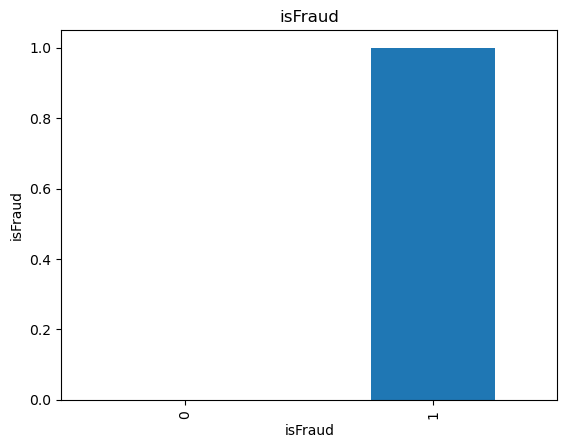

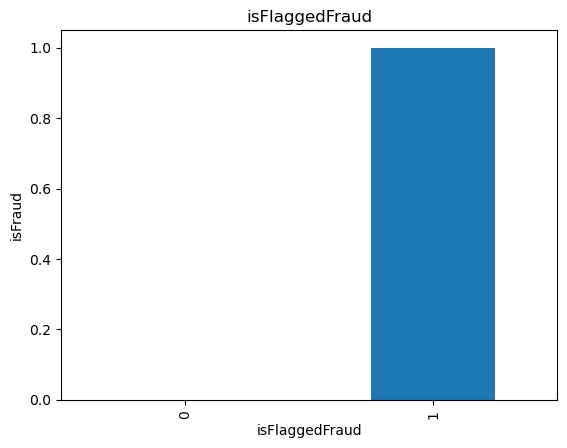

In [15]:
# finding the relationship between the discrete features and target  

import matplotlib.pyplot as plt

for feature in discretefeature:
    data = df.copy()
    data.groupby(feature)["isFraud"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("isFraud")
    plt.title(feature)
    plt.show()

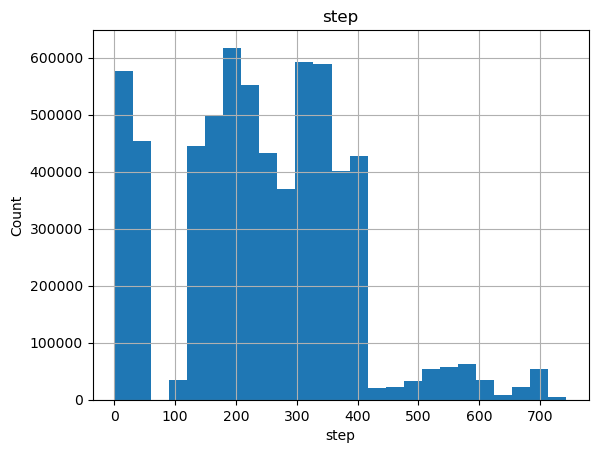

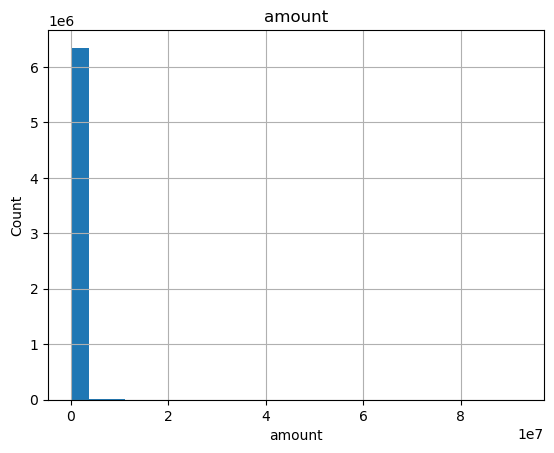

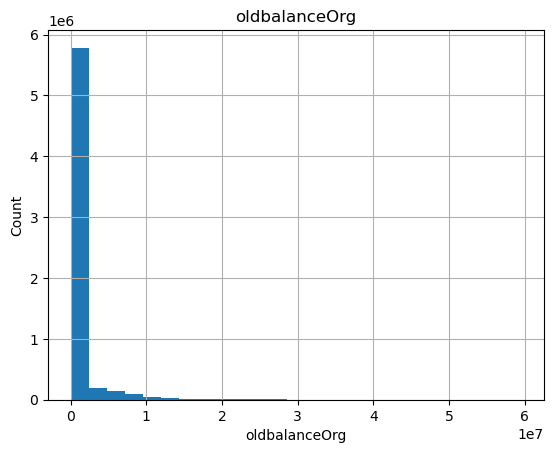

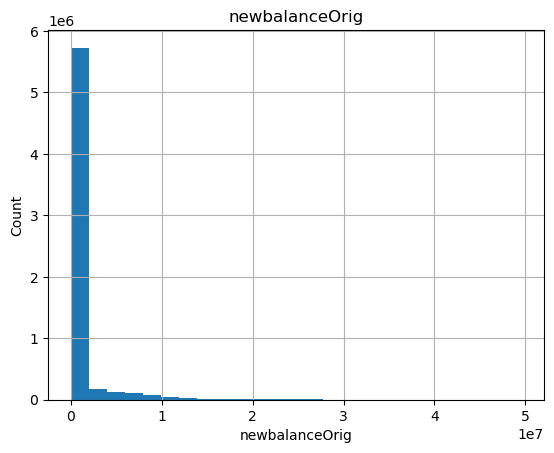

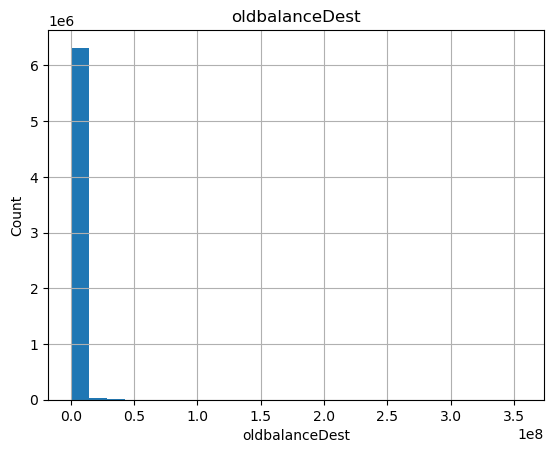

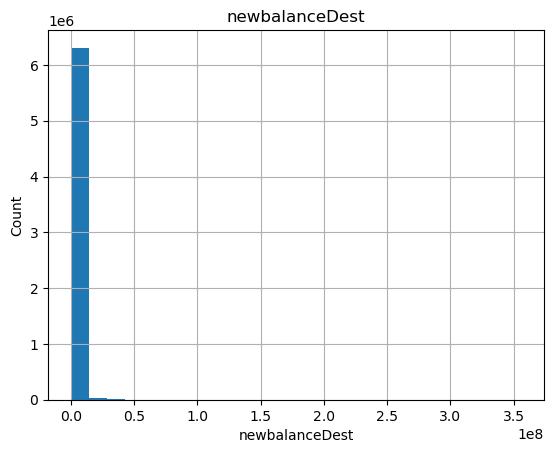

In [16]:
continuousfeature = [feature for feature in numericalfeatures if feature not in discretefeature]

## analysing the continous features by creating histogram to understand the distribution of the values

for feature in continuousfeature:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

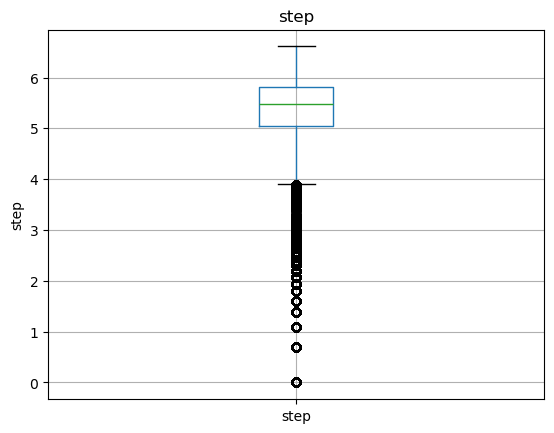

In [20]:
# boxplots for continuous features.

for feature in continuousfeature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        # plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

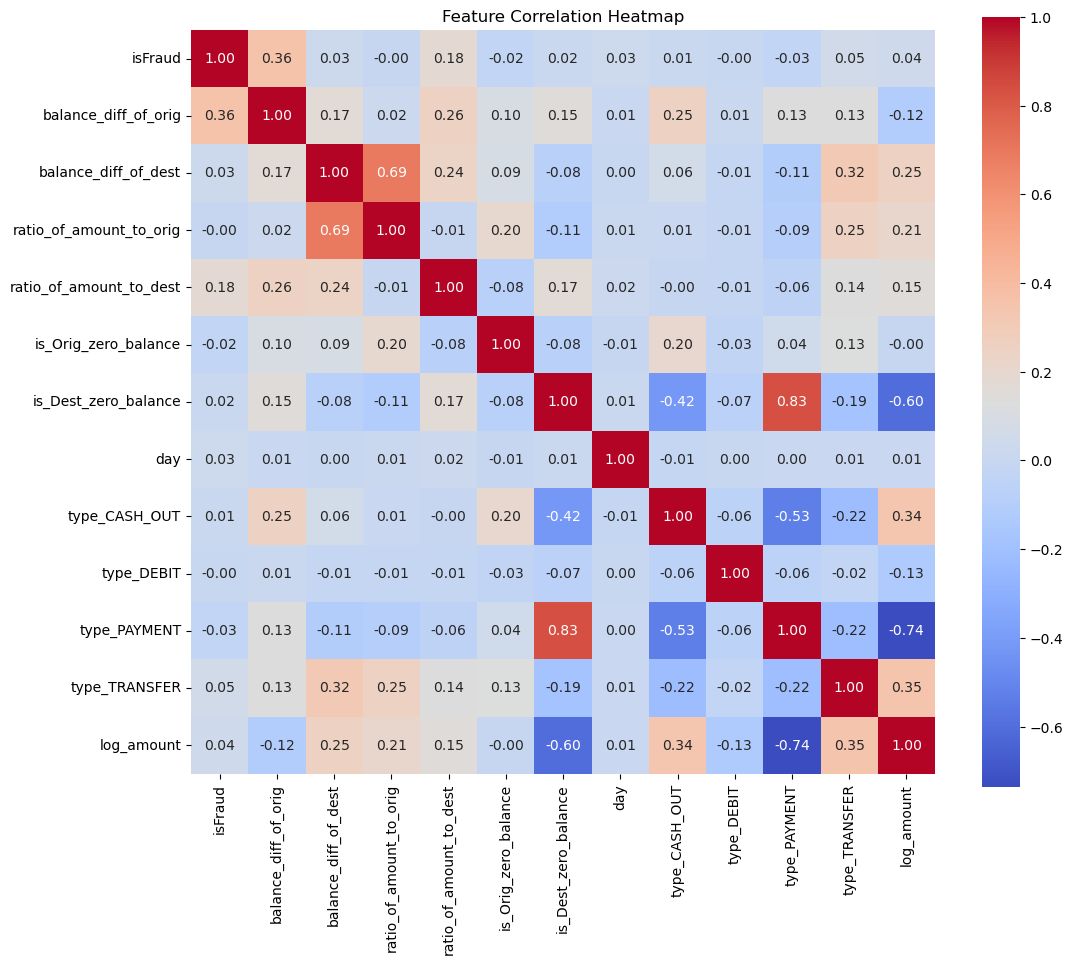

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature Engineering

In [32]:
df2 = df.copy()

df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [33]:
# Difference before and after transaction for origin and destination
df['balance_diff_of_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] # storing the amount difference after money debited
df['balance_diff_of_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [34]:
df['ratio_of_amount_to_orig'] = df['amount'] / (df['oldbalanceOrg'] + 1) # storing the ratio, like, how much of the total moeny was deducted
df['ratio_of_amount_to_dest'] = df['amount'] / (df['oldbalanceDest'] + 1)

In [35]:
df['is_Orig_zero_balance'] = (df['oldbalanceOrg'] == 0).astype(int) # checks for 0 balance in account and flags that
df['is_Dest_zero_balance'] = (df['oldbalanceDest'] == 0).astype(int)


In [36]:
df['day'] = df['step'] // 24

In [37]:
# One hot encoding for 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [38]:
import numpy as np

df['log_amount'] = np.log1p(df['amount'])  # log1p handles zero


In [39]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_diff_of_orig',
       'balance_diff_of_dest', 'ratio_of_amount_to_orig',
       'ratio_of_amount_to_dest', 'is_Orig_zero_balance',
       'is_Dest_zero_balance', 'day', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'log_amount'],
      dtype='object')

In [40]:
df.drop(columns=['step','amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','isFlaggedFraud'], inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42) # applying smote
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model training
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=10,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            random_state=42)

# Train the model
rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Random Forest Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

Random Forest Results
[[1270716     165]
 [      2    1641]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.91      1.00      0.95      1643

    accuracy                           1.00   1272524
   macro avg       0.95      1.00      0.98   1272524
weighted avg       1.00      1.00      1.00   1272524

AUC-ROC Score: 0.9998017288779785


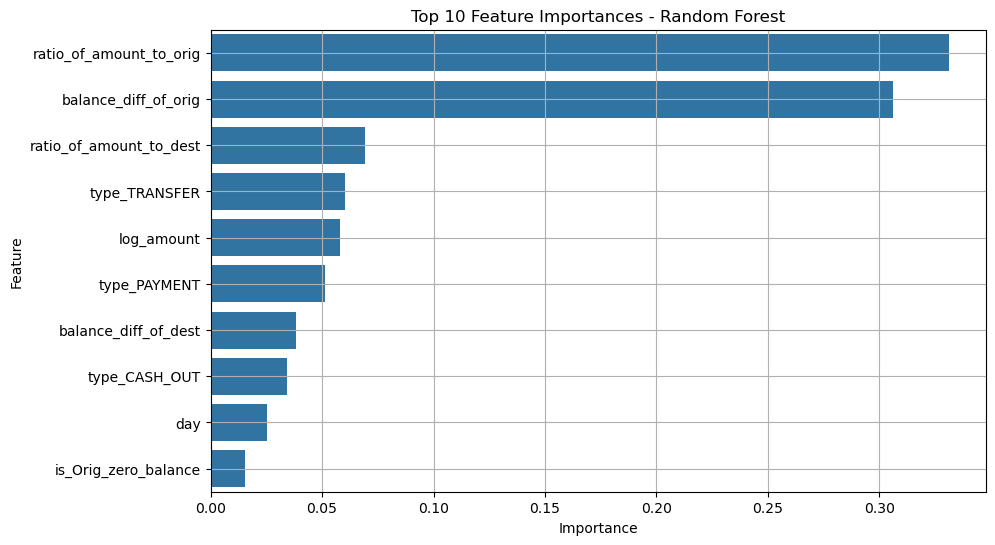

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X_train_res.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances - Random Forest")
plt.grid()
plt.show()


In [44]:
feat_imp

,Feature,Importance
2,ratio_of_amount_to_orig,0.331121
0,balance_diff_of_orig,0.306225
3,ratio_of_amount_to_dest,0.069294
10,type_TRANSFER,0.060291
11,log_amount,0.057989
9,type_PAYMENT,0.051172
1,balance_diff_of_dest,0.038325
7,type_CASH_OUT,0.034046
6,day,0.025258
4,is_Orig_zero_balance,0.015340


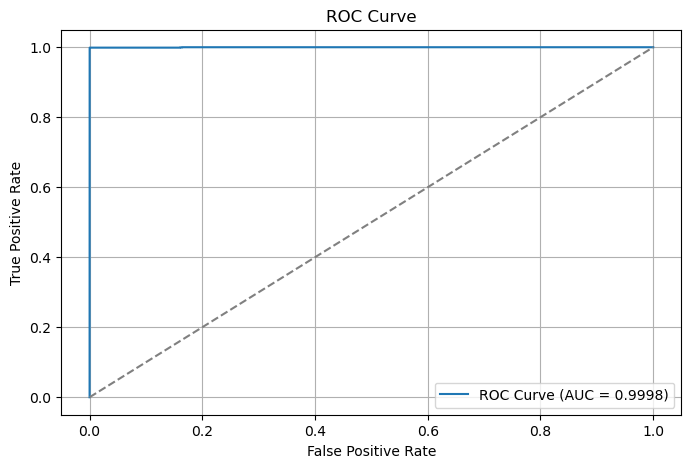

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

